In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import joypy

In [2]:
parfumo_data_clean = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-10/parfumo_data_clean.csv')


In [3]:
perfume_df = parfumo_data_clean

In [4]:
perfume_df['Release_Year'] = perfume_df['Release_Year'].astype('Int64')

In [5]:
# Fill missing values with empty strings
perfume_df['Main_Accords'] = perfume_df['Main_Accords'].fillna('')

# Split the main_accords column into individual words and Remove spaces in any of the column names
perfume_df = perfume_df.assign(Main_Accords = perfume_df['Main_Accords']
                               .str.split(',')
                               .apply(lambda x: [s.strip() for s in x]))

# Explode the DataFrame to have one word per row
perfume_df = perfume_df.explode('Main_Accords')

# Remove empty strings
perfume_df = perfume_df[perfume_df['Main_Accords'] != '']

# Group by date and main_accords and count occurrences
note_counts = perfume_df.groupby(['Release_Year', 'Main_Accords']).size().reset_index(name='Count')

# Pivot the DataFrame to have dates as index and words as columns
pivot_counts = note_counts.pivot(index='Release_Year', columns='Main_Accords', values='Count').fillna(0)

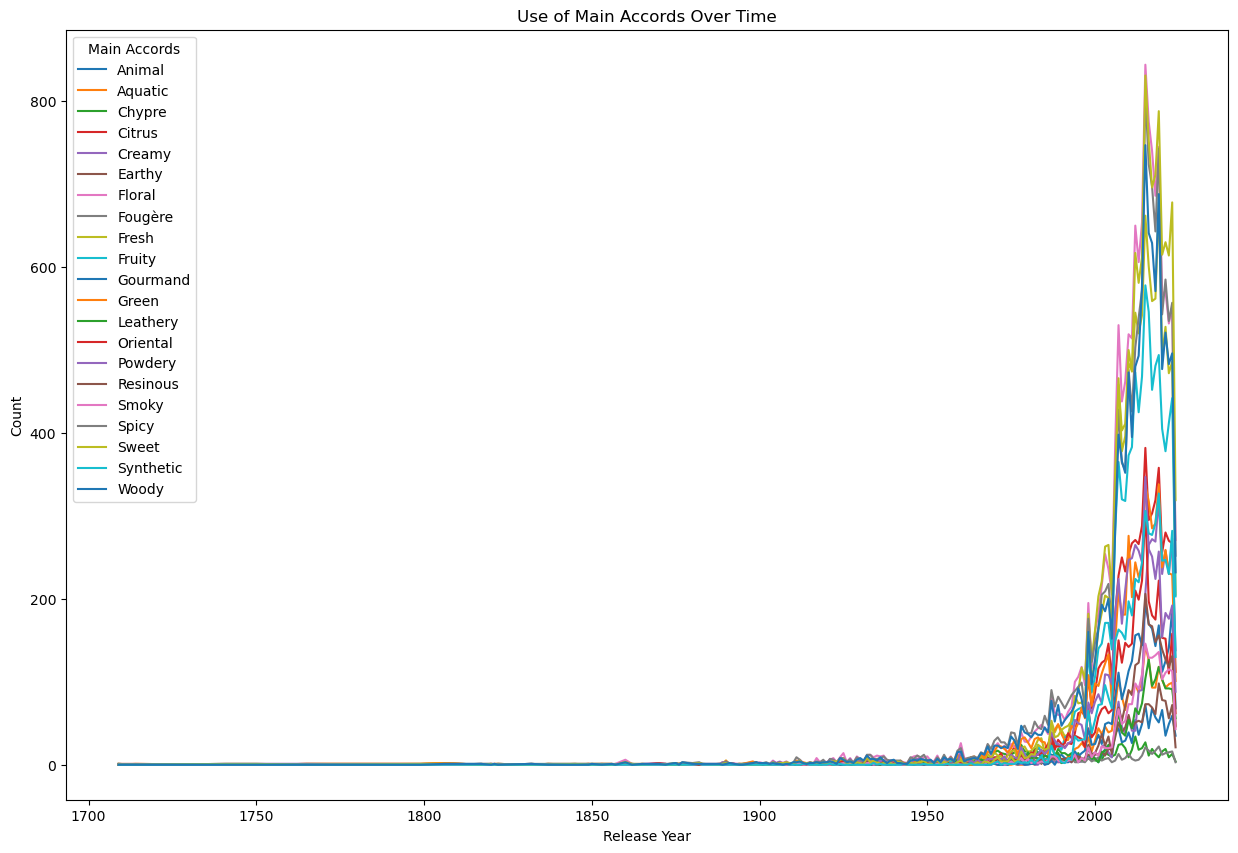

In [6]:
pivot_counts.plot(kind='line', figsize = (15,10))
plt.title('Use of Main Accords Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Main Accords')
plt.show()

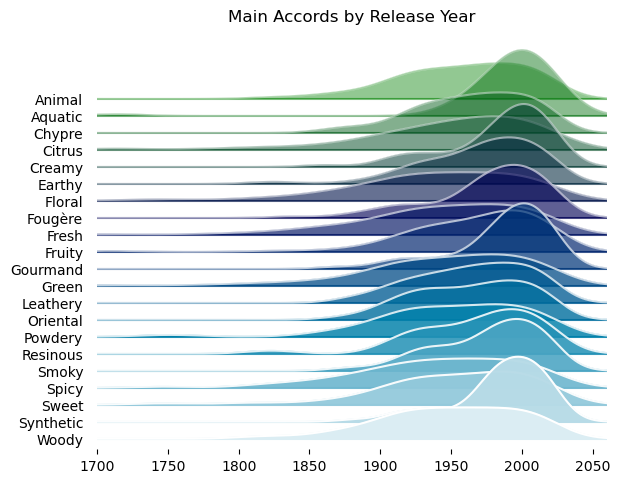

In [7]:
fig, axes = joypy.joyplot(note_counts, by = 'Main_Accords', 
                        column = 'Release_Year', 
                        linecolor = "white", 
                        colormap = cm.ocean, 
                        fade=True)
for ax in axes: ax.set_xlim(1700, 2060)

plt.title('Main Accords by Release Year') 

plt.savefig('main-accords-by-year.png')

plt.show()
